#### Notebook destinado ao tratamento da base de dados para utilizar na Visualização

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [102]:
df = pd.read_csv('olympic_results.csv')

In [103]:
df_ouro = df[df['medal_type'] == 'GOLD'].copy()

In [104]:
# extraindo o ano de cada olimpiada
df_ouro['ano'] = df_ouro['slug_game'].str[-4:].astype(int)
df_ouro = df_ouro.dropna(subset=['ano'])

anos = np.arange(1850, 2018, 1)

df_ouro = df_ouro[df_ouro['ano'].isin(anos)]

In [105]:
df_atletismo_tempo =  df_ouro[(df_ouro['discipline_title'] == 'Athletics') & (df_ouro['value_type'] == 'TIME')]
df_atletismo_distancia =  df_ouro[(df_ouro['discipline_title'] == 'Athletics') & (df_ouro['value_type'] == 'DISTANCE')]
df_peso =  df_ouro[(df_ouro['discipline_title'] == 'Weightlifting') & (df_ouro['value_type'] == 'WEIGHT')]

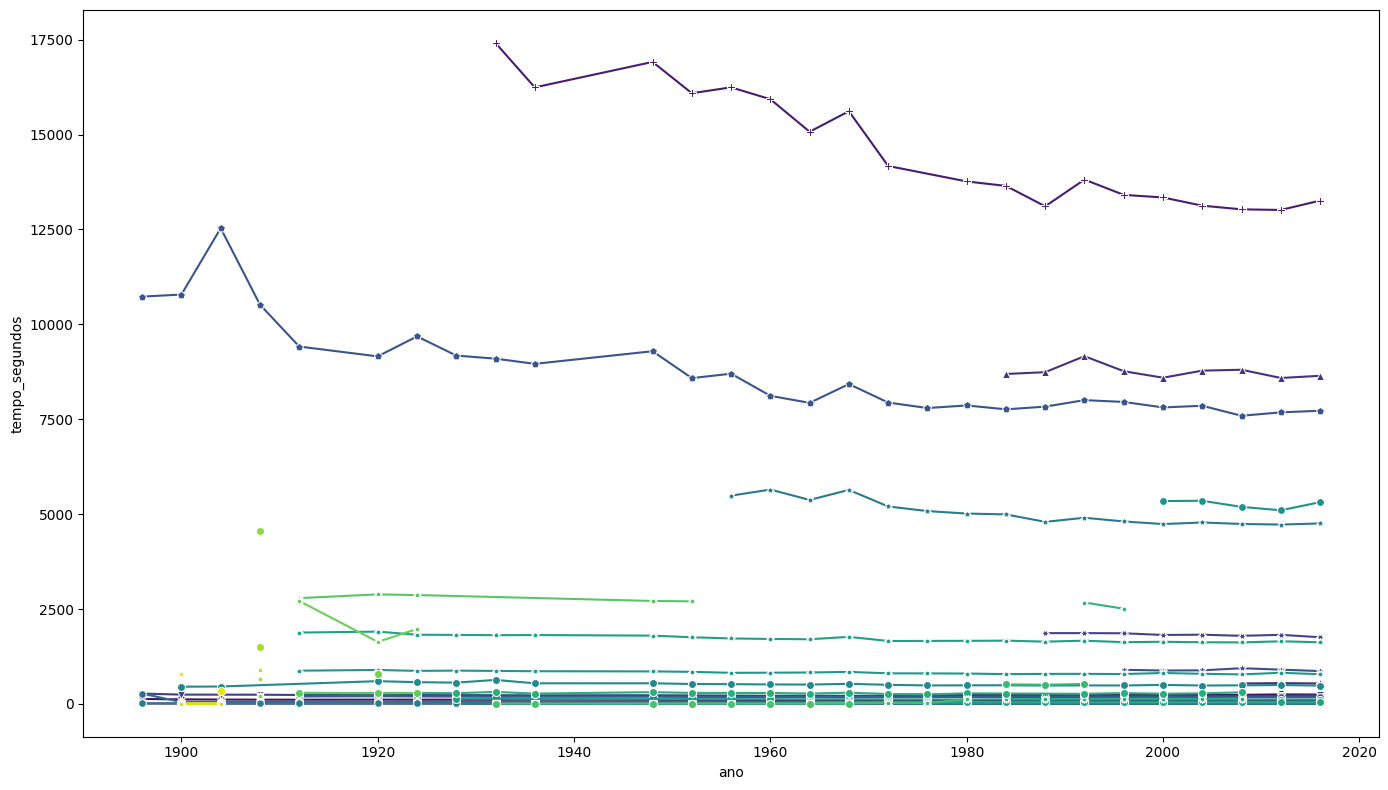

In [106]:
df_corridas = df_atletismo_tempo.copy()

import numpy as np

def converter_tempo(valor):
    try:
        # tempo no formato 9000 = 9 seg
        if isinstance(valor, (int, float)) or (isinstance(valor, str) and ':' not in valor):
            return float(valor) / 1000
        
        # tempo no formato minuto:segundo:centesimo
        elif ':' in valor:
            partes = valor.split(':')
            if len(partes) == 2: 
                minutos = float(partes[0])
                segundos = float(partes[1])
                return minutos * 60 + segundos
            
    except (ValueError, TypeError, AttributeError):
        pass 
    
    return np.nan

df_corridas['tempo_segundos'] = df_corridas['value_unit'].apply(converter_tempo)
df_corridas['tempo_segundos'] = df_corridas.groupby('event_title')['tempo_segundos'].bfill().ffill()

plt.figure(figsize=(14, 8))

sns.lineplot(
    data=df_corridas,
    x='ano',
    y='tempo_segundos',
    hue='event_title',  
    style='event_title', 
    markers=True,     
    dashes=False,      
    errorbar=None,     
    legend=False,    
    palette='viridis'   
)

plt.tight_layout()
plt.show()

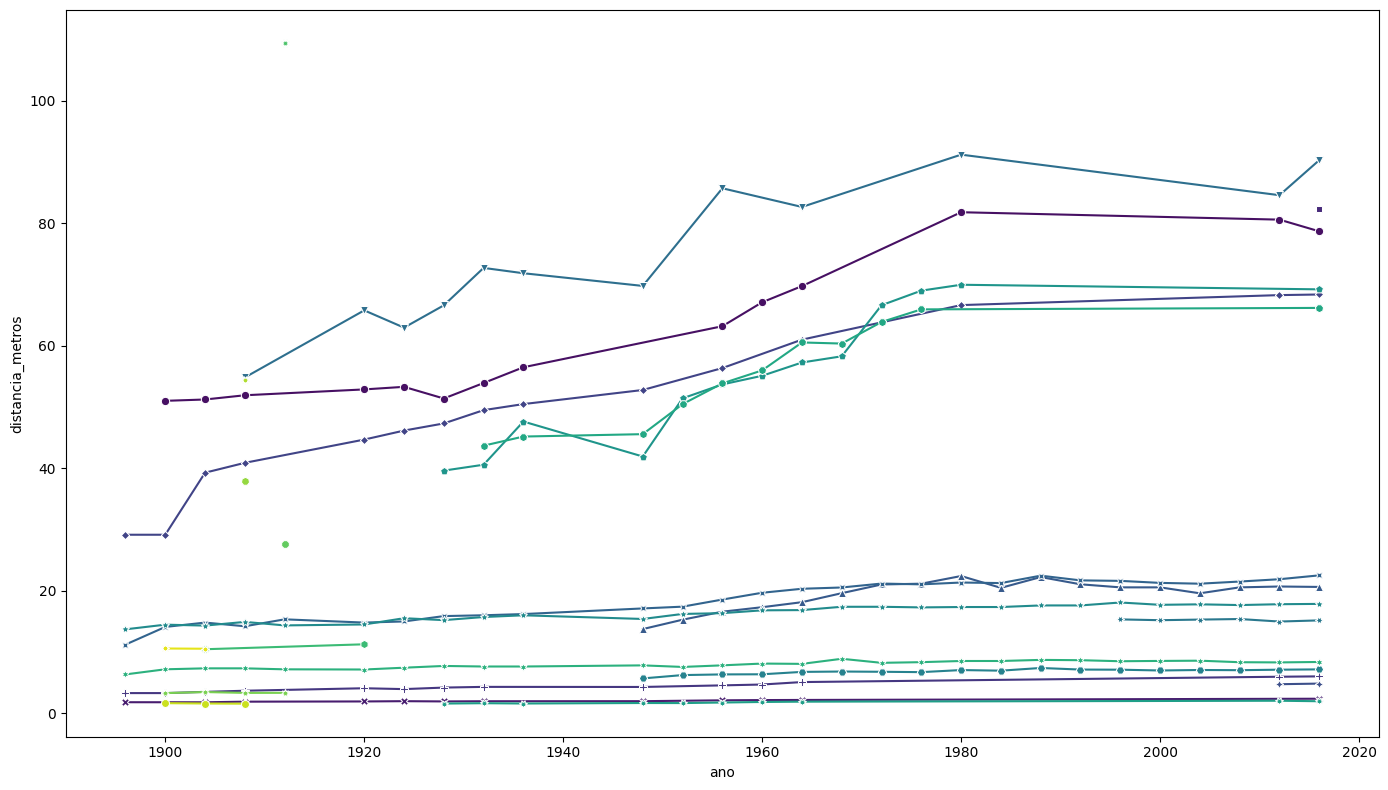

In [107]:
df_distancias = df_atletismo_distancia.copy()

def converter_dist(valor):
    try:
        return float(valor)
    except (ValueError, TypeError):
        return np.nan

df_distancias['distancia_metros'] = df_atletismo_distancia['value_unit'].apply(converter_dist)
df_distancias['distancia_metros'] = df_distancias.groupby('event_title')['distancia_metros'].bfill().ffill()

plt.figure(figsize=(14, 8))

sns.lineplot(
    data=df_distancias,
    x='ano',
    y='distancia_metros',
    hue='event_title',  
    style='event_title', 
    markers=True,     
    dashes=False,      
    errorbar=None,    
    legend=False,     
    palette='viridis'   
)

plt.tight_layout()
plt.show()

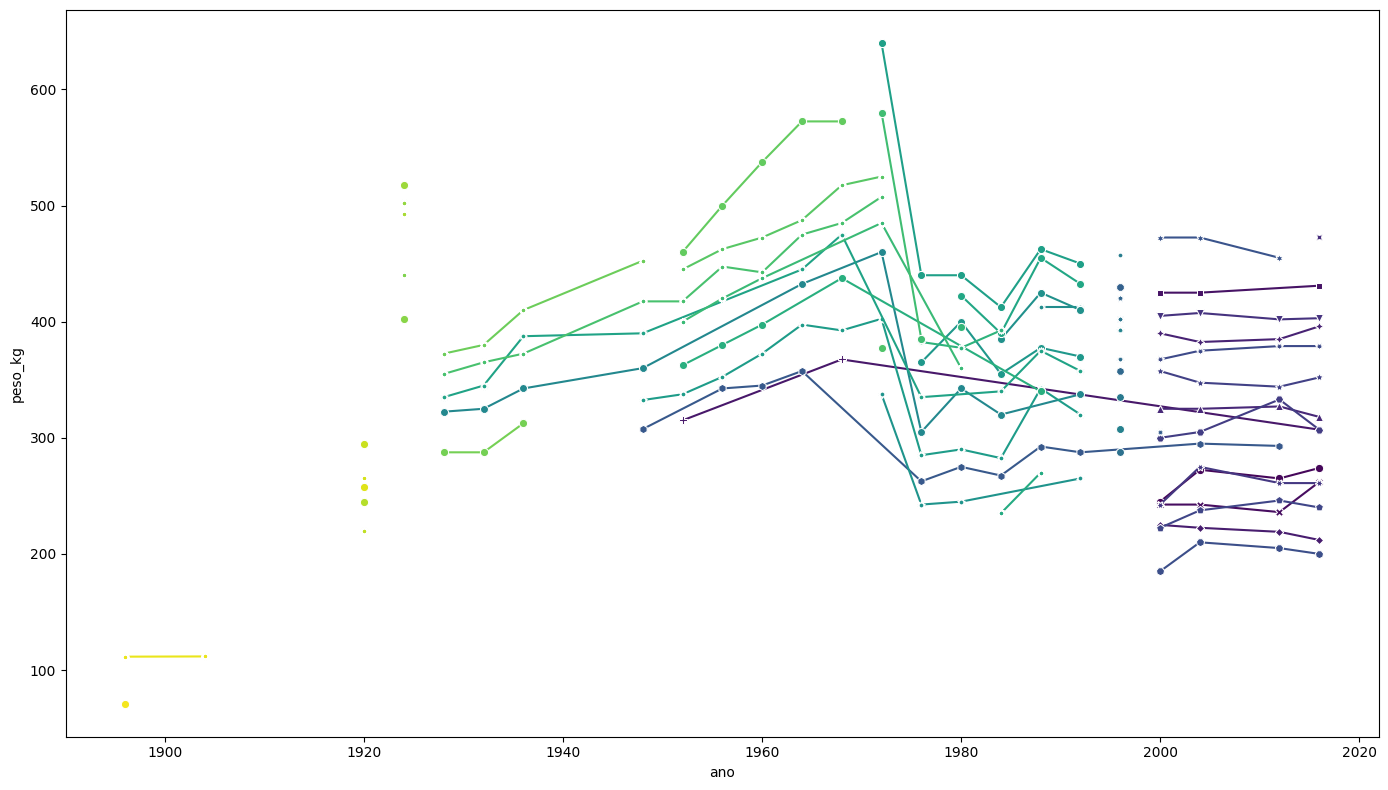

In [108]:
df_pesos = df_peso.copy()

def converter_peso(valor):
    try:
        return float(valor)
    except (ValueError, TypeError):
        return np.nan

df_pesos['peso_kg'] = df_peso['value_unit'].apply(converter_peso)
df_pesos['peso_kg'] = df_pesos.groupby('event_title')['peso_kg'].bfill().ffill()

plt.figure(figsize=(14, 8))

sns.lineplot(
    data=df_pesos,
    x='ano',
    y='peso_kg',
    hue='event_title',  
    style='event_title', 
    markers=True,     
    dashes=False,      
    errorbar=None,         
    legend=False,
    palette='viridis'   
)

plt.tight_layout()
plt.show()

In [116]:
df_final = pd.concat([df_corridas, df_distancias, df_pesos], ignore_index=True)

df_final.to_csv('df_processed.csv', index=False)